In [1]:
#Importing the Packages
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlopen
import pandas as pd
import json
from pandas.io.json import json_normalize

In [2]:
#Getting the data from the URL
url = urlopen("http://django01account.pythonanywhere.com/?api=qwerty12345")
elevation = url.read()
data = json.loads(elevation)
print(data)

{'population': [{'child': 1524, 'male': 142814, 'id': 1, 'female': 77224, 'year': 2001}, {'child': 1163, 'male': 135053, 'id': 2, 'female': 65197, 'year': 2002}, {'child': 5598, 'male': 122144, 'id': 3, 'female': 79153, 'year': 2003}, {'child': 4556, 'male': 171612, 'id': 4, 'female': 75987, 'year': 2004}, {'child': 5059, 'male': 120790, 'id': 5, 'female': 84249, 'year': 2005}, {'child': 5535, 'male': 143326, 'id': 6, 'female': 82552, 'year': 2006}, {'child': 2185, 'male': 195856, 'id': 7, 'female': 79060, 'year': 2007}, {'child': 1099, 'male': 192416, 'id': 8, 'female': 76207, 'year': 2008}, {'child': 1408, 'male': 102169, 'id': 9, 'female': 83478, 'year': 2009}, {'child': 3705, 'male': 136666, 'id': 10, 'female': 65325, 'year': 2010}, {'child': 1672, 'male': 181503, 'id': 11, 'female': 79338, 'year': 2011}, {'child': 5436, 'male': 122771, 'id': 12, 'female': 66313, 'year': 2012}, {'child': 3479, 'male': 116261, 'id': 13, 'female': 71858, 'year': 2013}, {'child': 2431, 'male': 139256,

In [3]:
#Normalizing and and converting it to DataFrame
dd = json_normalize(data['population'])
df = pd.DataFrame(dd)
print(df)

    child  female  id    male  year
0    1524   77224   1  142814  2001
1    1163   65197   2  135053  2002
2    5598   79153   3  122144  2003
3    4556   75987   4  171612  2004
4    5059   84249   5  120790  2005
5    5535   82552   6  143326  2006
6    2185   79060   7  195856  2007
7    1099   76207   8  192416  2008
8    1408   83478   9  102169  2009
9    3705   65325  10  136666  2010
10   1672   79338  11  181503  2011
11   5436   66313  12  122771  2012
12   3479   71858  13  116261  2013
13   2431   83976  14  139256  2014
14   3116   84993  15  145327  2015


In [4]:
#Calculating the total
df['total'] = df['male'] + df['female'] + df['child']
print(df)

    child  female  id    male  year   total
0    1524   77224   1  142814  2001  221562
1    1163   65197   2  135053  2002  201413
2    5598   79153   3  122144  2003  206895
3    4556   75987   4  171612  2004  252155
4    5059   84249   5  120790  2005  210098
5    5535   82552   6  143326  2006  231413
6    2185   79060   7  195856  2007  277101
7    1099   76207   8  192416  2008  269722
8    1408   83478   9  102169  2009  187055
9    3705   65325  10  136666  2010  205696
10   1672   79338  11  181503  2011  262513
11   5436   66313  12  122771  2012  194520
12   3479   71858  13  116261  2013  191598
13   2431   83976  14  139256  2014  225663
14   3116   84993  15  145327  2015  233436


In [5]:
x = df['year']
y = df['male']
y2 = df['female']
y3 = df['child']
total = df['total']

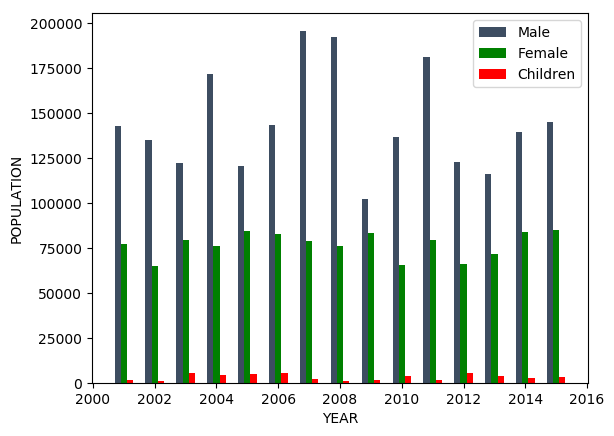

In [6]:
#1st Graph Population vs Year
plt.rcdefaults()
ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='#3D4D61', align='center', label='Male')
ax.bar(x, y2, width=0.2, color='g', align='center', label='Female')
ax.bar(x+0.2, y3, width=0.2, color='r', align='center', label='Children')
plt.xlabel('YEAR')
plt.ylabel('POPULATION')
plt.legend()
plt.savefig('C:\\Users\\user\\Pictures\\Project\\yearly.png', format='png')
plt.show()

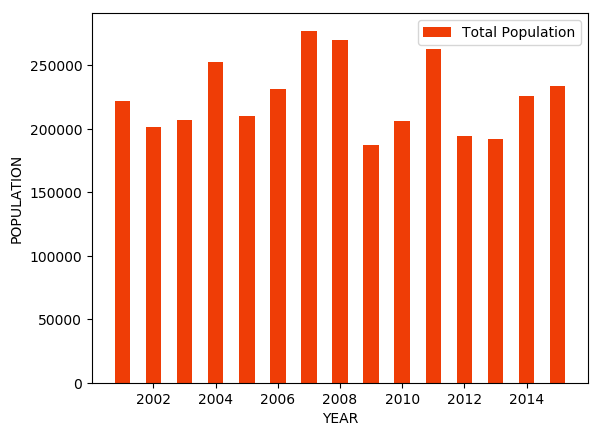

In [7]:
#2nd Graph Total Population VS Year
plt.rcdefaults()
plt.bar(x, total, width=0.5, color='#EF3D06', label='Total Population')
plt.xlabel('YEAR')
plt.ylabel('POPULATION')
plt.legend()
plt.savefig('C:\\Users\\user\\Pictures\\Project\\total.png', format='png')
plt.show()

In [8]:
#Fetching the data for the year which has the highest population records
highest_id = df['total'].idxmax()
year_highest = df['year'][highest_id]
values = [df['male'][highest_id], df['female'][highest_id], df['child'][highest_id]]
print(values)

[195856, 79060, 2185]


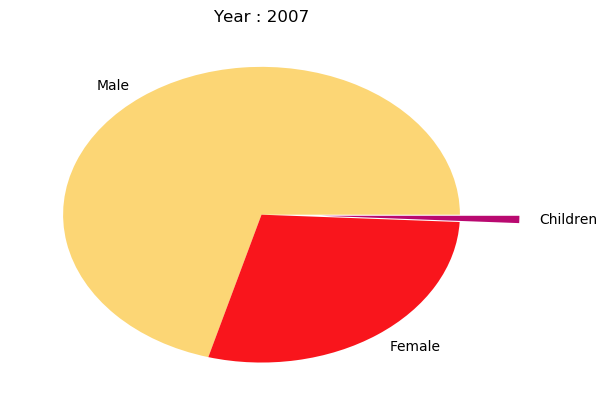

In [9]:
#3rd PIE CHART
plt.rcdefaults()
colors = ['#FCD675', '#F9151C', '#B90970']
labels = ['Male', 'Female', 'Children']
explode = [0, 0, 0.3]

plt.pie(values, colors=colors, labels=labels, explode=explode)
plt.title('Year : '+str(year_highest))
plt.savefig('C:\\Users\\user\\Pictures\\Project\\pie.png', format='png')
plt.show()